In [125]:
library(xts)
library(forecast)
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [8]:
#read the data
prices <- read.csv("C:/Users/alexd/Downloads/sugar_flour.csv")

In [19]:
#drop duplicates
prices <- unique(prices)

In [31]:
flour_prices <- prices[prices$Product.ID == "0417236e-13f2-47c1-989c-7e615d22b7eb",]

In [33]:
sugar_prices <- prices[prices$Product.ID != "0417236e-13f2-47c1-989c-7e615d22b7eb",]

In [48]:
#format as date
flour_ts <- xts(flour_prices$Sell.Price, as.Date(flour_prices$Effective.From, format = "%m/%d/%Y"))
sugar_ts <- xts(sugar_prices$Sell.Price, as.Date(sugar_prices$Effective.From, format = "%m/%d/%Y"))

In [61]:
#create an empty time series with our date range
dates <- seq(from = min(index(flour_ts)), to = max(index(flour_ts)), by = 1)
empty <- zoo(, dates)

In [62]:
#merge with the flour data to create a time-series object
flour <- na.locf(merge(flour_ts, empty, all = TRUE))

In [74]:
sugar <- na.locf(merge(sugar_ts, empty, all = TRUE))

In [75]:
#delete duplicates by taking the last price on each da
flour <- aggregate(flour, identity, tail, 1)

In [76]:
sugar <- aggregate(sugar, identity, tail, 1)

In [84]:
f <- coredata(flour)[, 1]
s <- coredata(sugar)[, 1]

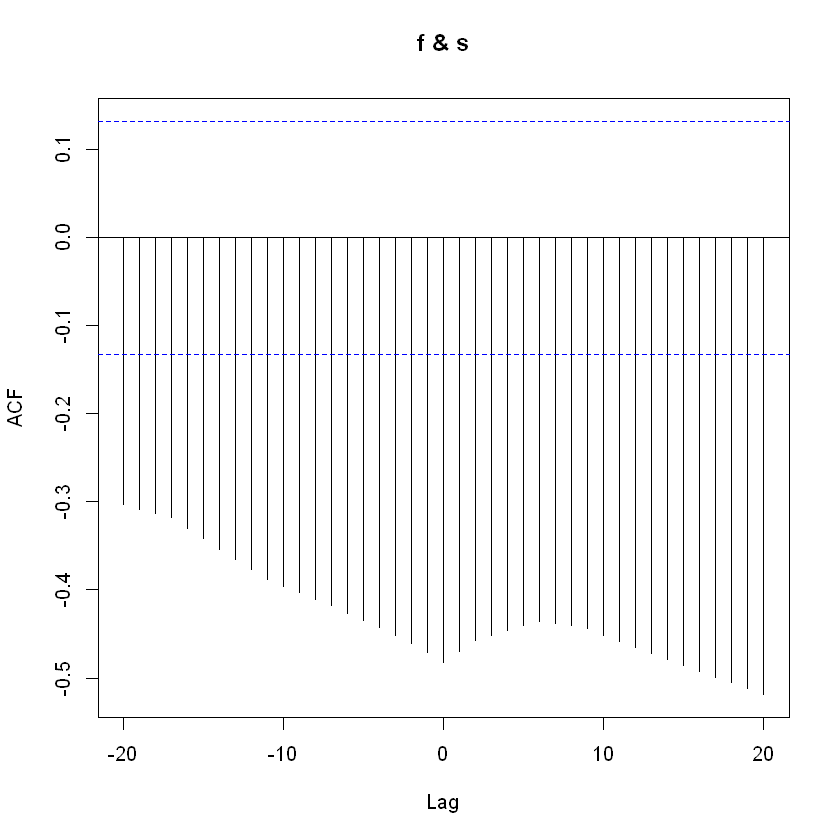

In [92]:
#plot the correlation coefficient
ccf(f,s)

In [100]:
m <- lm(coredata(flour) ~ index(flour))

In [102]:
n <- lm(coredata(sugar) ~ index(sugar))

In [114]:
#plot the residuals to control for the underlying trends
f_r <- zoo(resid(m), index(flour))
s_r <- zoo(resid(n), index(sugar))

In [115]:
f_d <- coredata(f_r)
s_d <- coredata(s_r)

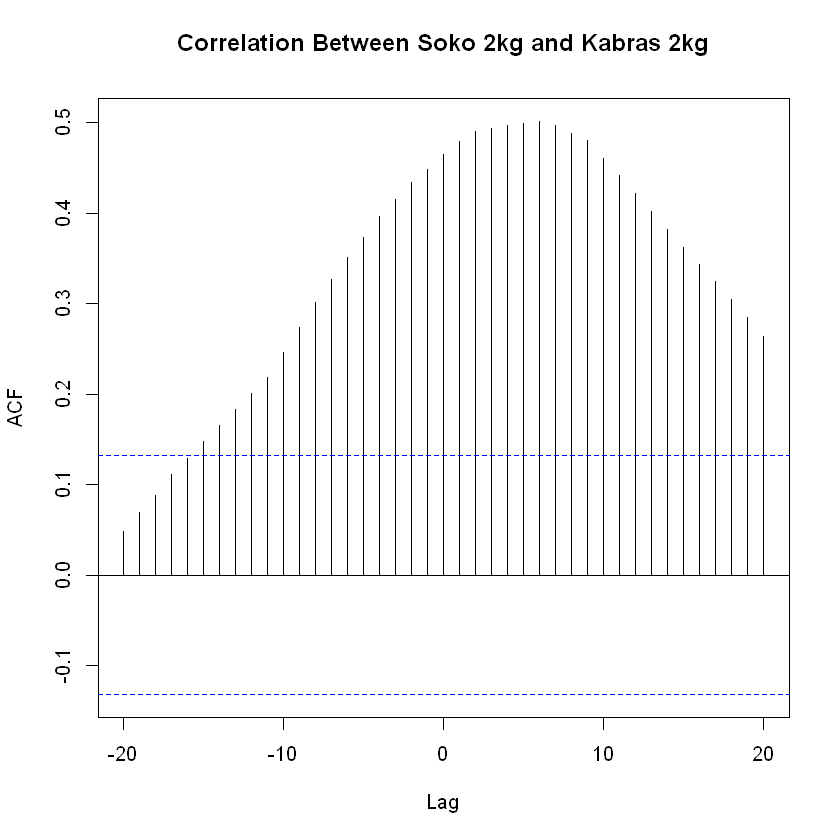

In [117]:
ccf(f_d, s_d, main = "Correlation Between Soko 2kg and Kabras 2kg")

Don't know how to automatically pick scale for object of type zoo. Defaulting to continuous.
`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


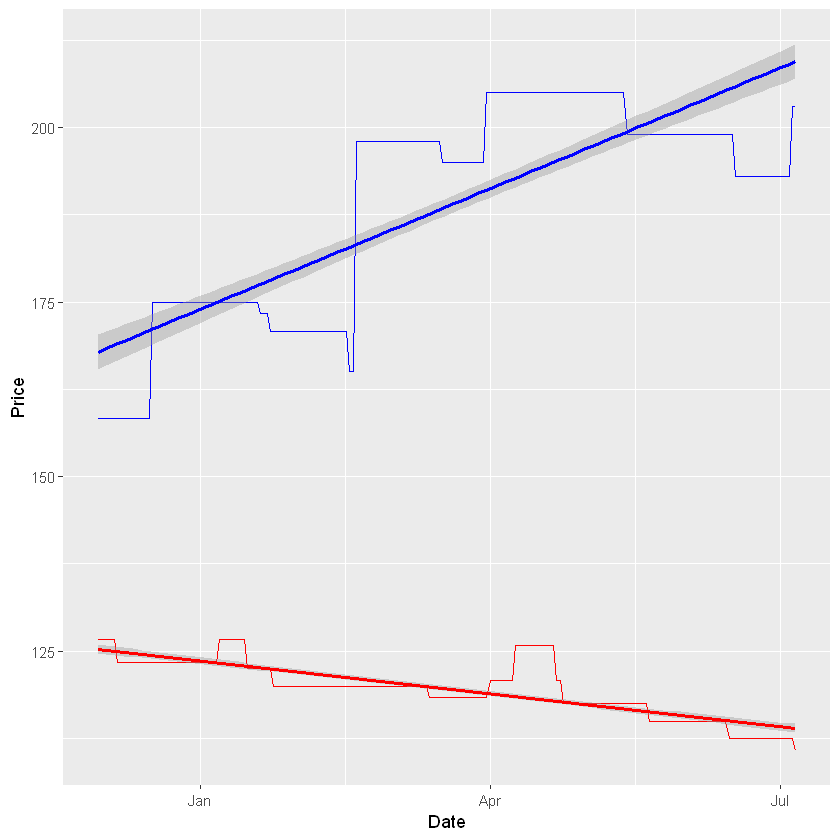

In [142]:
#plot price of 2kg bag of flour against 2kg bag of sugar
ggplot() +
    geom_line(data = flour, aes(x = Index, y = flour), color = "red") + 
    geom_line(data = sugar, aes(x = Index, y = sugar), color = "blue") +               
    geom_smooth(data = flour, aes(x = Index, y = flour), color = "red", method = "lm") + 
    geom_smooth(data = sugar, aes(x = Index, y = sugar), color = "blue", method = "lm") +
    theme(legend.position = "none") +
    labs(y="Price", x = "Date")